# Import Library

In [26]:
import numpy as np
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from sklearn import clone
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


# Soal

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan.
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dalam sebuah repositori Git (misalnya, di GitHub atau GitLab) dan kirimkan tautannya kepada kami.
4. Sebelum di kumpulkan, kode **WAJIB** dijalankan.

## Deskripsi Dataset

Dataset yang akan dipakai pada soal ini adalah dataset [Bank Customer Churn](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn) dengan sedikit modifikasi. Silahkan klik link tersebut untuk mengetahui penjelasan fitur-fiturnya.

Target variable pada dataset ini adalah `Exited`. Jumlah customer yang tidak meninggalkan bank (`Exited=0`) adalah 7962, sedangkan jumlah customer yang meninggalkan bank (`Exited=1`) adalah 159. Ini membuat dataset menjadi imbalance dan anda akan menangani kasus imbalance data tersebut.

In [27]:
df=pd.read_csv('Customer-Churn-Records-v2.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8121 entries, 0 to 8120
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8121 non-null   int64  
 1   Geography           8121 non-null   object 
 2   Gender              8121 non-null   object 
 3   Age                 8121 non-null   int64  
 4   Tenure              8121 non-null   int64  
 5   Balance             8121 non-null   float64
 6   NumOfProducts       8121 non-null   int64  
 7   HasCrCard           8121 non-null   int64  
 8   IsActiveMember      8121 non-null   int64  
 9   EstimatedSalary     8121 non-null   float64
 10  Exited              8121 non-null   int64  
 11  Complain            8121 non-null   int64  
 12  Satisfaction Score  8121 non-null   int64  
 13  Card Type           8121 non-null   object 
 14  Point Earned        8121 non-null   int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 951.8

In [29]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,757,Germany,Female,34,9,101861.36,2,0,0,187011.96,0,0,5,PLATINUM,903
1,644,France,Male,33,8,0.00,2,1,1,155294.17,0,0,5,SILVER,813
2,655,Spain,Female,56,5,0.00,2,1,1,41782.70,0,0,2,PLATINUM,979
3,710,Spain,Female,36,8,0.00,2,0,0,83206.19,0,0,3,SILVER,636
4,684,Spain,Female,31,8,0.00,2,1,0,188637.05,0,0,4,SILVER,515


In [30]:
df['Exited'].value_counts()

Exited
0    7962
1     159
Name: count, dtype: int64

## 1. Imbalanced dataset

### 1.A Buatlah sebuah dataset baru yang terdiri dari kolom `EstimatedSalary` dan kolom `Balance` sebagai fitur-fiturnya (X), dan kolom `Exited` sebagai target (y).

In [31]:
# 1.a Membuat dataset baru dengan kolom EstimatedSalary dan Balance sebagai fitur (X), dan kolom Exited sebagai target (y)
X = df[['EstimatedSalary', 'Balance']].values
y = df['Exited'].values

print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("First 5 rows of X:")
print(X[:5])
print("First 5 values of y:")
print(y[:5])

Shape X: (8121, 2)
Shape y: (8121,)
First 5 rows of X:
[[187011.96 101861.36]
 [155294.17      0.  ]
 [ 41782.7       0.  ]
 [ 83206.19      0.  ]
 [188637.05      0.  ]]
First 5 values of y:
[0 0 0 0 0]


### 1.B Hitung jumlah masing-masing target (Hint: Counter).

In [32]:
# 1.b Hitung jumlah masing-masing target
counter = Counter(y)
print("Jumlah masing-masing target:")
print(f"Class 0 (Tidak keluar): {counter[0]}")
print(f"Class 1 (Keluar): {counter[1]}")
print(f"Rasio imbalance: {counter[0]/counter[1]:.2f}:1")

Jumlah masing-masing target:
Class 0 (Tidak keluar): 7962
Class 1 (Keluar): 159
Rasio imbalance: 50.08:1


### 1.C Visualisasikan dataset pada soal (1a) dengan scatter plot. Berikan warna yang berbeda untuk setiap kelasnya

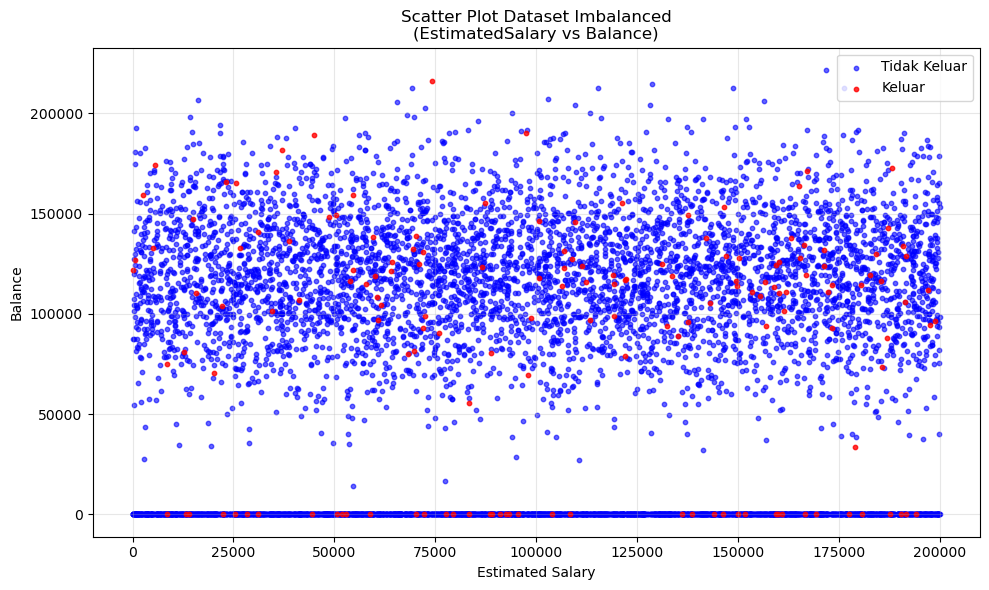

Jumlah data class 0 (biru): 7962
Jumlah data class 1 (merah): 159


In [33]:
# Visualisasi scatter plot dengan warna berbeda untuk setiap kelas
plt.figure(figsize=(10, 6))

# Scatter plot untuk setiap kelas
class_0 = X[y == 0]
class_1 = X[y == 1]

plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', alpha=0.6, label='Tidak Keluar', s=10)
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', alpha=0.8, label='Keluar', s=10)

plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.title('Scatter Plot Dataset Imbalanced\n(EstimatedSalary vs Balance)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Jumlah data class 0 (biru): {len(class_0)}")
print(f"Jumlah data class 1 (merah): {len(class_1)}")

### 1.D Lengkapilah fungsi di bawah ini untuk melakukan oversampling pada setiap fold ketika melakukan cross validation pada suatu model menggunakan StratifiedKFold dengan k=5, shuffle=True, dan random_state=42. Tampilkan juga rata-rata skor accuracy, f1 macro, precision macro, dan recall macro.

Jalankan fungsi tersebut dengan menggunakan:
- DecisionTreeClassifier, dengan random_state=42
- Teknik oversampling RandomOversampler, dengan random_state=42
- X dan y yang didefinisikan pada soal (1a)

*(Pastikan validation test dataset tidak terganggu oleh penambahan data - data sintetis.)*

In [34]:
def train_and_evaluate_with_oversampling(model, X, y, resample_method):
    # TODO: Gunakan StratifiedK-fold biasa (Ubah None menjadi jawaban)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # TODO: Simpan hasil skor metrik setiap iterasi pada sebuah list
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    # Iterasi untuk membagi fold mana yang menjadi training dan validation test dataset
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

        # TODO: Lakukan fit resample dari menggunakan variabel resample_method di parameter method ini (Ubah None menjadi jawaban)
        X_train_sampled, y_train_sampled = resample_method.fit_resample(X_train, y_train)

        model_clone = clone(model) # Cloning model untuk membuat model harus dilatih lagi untuk memprediksi di luar method ini

        # TODO: Lakukan fitting model dari hasil clone model dengan X dan y dataset yang sudah diresample
        model_clone.fit(X_train_sampled, y_train_sampled)

        # TODO: Prediksi kelas kategori menggunakan model yang telah dilatih di atas dengan menggunakan validation test dataset (Ubah None menjadi jawaban)
        y_pred = model_clone.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        precision = precision_score(y_test, y_pred, average="macro")
        recall = recall_score(y_test, y_pred, average="macro")

        # TODO: Tambahkan hasil skor metrik ke dalam list yang bersesuaian
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        
        print(f"Fold {fold}: Accuracy={accuracy:.4f}, F1={f1:.4f}, Precision={precision:.4f}, Recall={recall:.4f}")

    # TODO: Hitung dan tampilkan mean dari setiap list skor metrik
    # Notes: ganti None dengan nama variabel list masing - masing metrik

    print("Mean scores across all folds:")
    print(f'Mean Accuracy: {np.mean(accuracy_scores):.4f}')
    print(f'Mean F1-score (macro): {np.mean(f1_scores):.4f}')
    print(f'Mean Precision (macro): {np.mean(precision_scores):.4f}')
    print(f'Mean Recall (macro): {np.mean(recall_scores):.4f}')

In [35]:
# 1.d Jalankan fungsi dengan DecisionTreeClassifier dan RandomOverSampler
model = DecisionTreeClassifier(random_state=42)
resample_method = RandomOverSampler(random_state=42)

train_and_evaluate_with_oversampling(model, X, y, resample_method)

Fold 1: Accuracy=0.9662, F1=0.4914, Precision=0.4900, Recall=0.4928
Fold 2: Accuracy=0.9667, F1=0.5260, Precision=0.5280, Recall=0.5244
Fold 3: Accuracy=0.9612, F1=0.4901, Precision=0.4900, Recall=0.4903
Fold 4: Accuracy=0.9600, F1=0.4898, Precision=0.4899, Recall=0.4896
Fold 5: Accuracy=0.9637, F1=0.4907, Precision=0.4900, Recall=0.4915
Mean scores across all folds:
Mean Accuracy: 0.9636
Mean F1-score (macro): 0.4976
Mean Precision (macro): 0.4976
Mean Recall (macro): 0.4977


### 1.E Jalankan kode di bawah ini. Apakah terdapat perbedaan skor dengan yang ada pada soal (1d)? Jika berbeda, mengapa hal tersebut bisa terjadi, dan approach manakah yang lebih tepat untuk dilakukan (approach (1d) atau (1e))?

In [36]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_oversampled, y_oversampled = RandomOverSampler(random_state=42).fit_resample(X, y)

scoring = ['accuracy','f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(DecisionTreeClassifier(random_state=42), X_oversampled, y_oversampled, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score):.4f}")

accuracy score: 0.9889
f1_macro score: 0.9889
precision_macro score: 0.9892
recall_macro score: 0.9889


#### Jawaban 1.e:

Ya, terdapat perbedaan yang signifikan antara kedua approach. Approach 1d (oversampling dalam setiap fold) menghasilkan Mean Accuracy 0.9636, Mean F1-score (macro) 0.4976, Mean Precision (macro) 0.4976, dan Mean Recall (macro) 0.4977. Sementara itu, approach 1e (oversampling sebelum cross validation) menunjukkan hasil yang jauh lebih tinggi dengan Accuracy 0.9889, F1 macro 0.9889, Precision macro 0.9892, dan Recall macro 0.9889.

Perbedaan ini terjadi karena adanya data leakage pada approach 1e. Ketika oversampling dilakukan pada seluruh dataset sebelum cross validation, data sintetis dari training set dapat "bocor" ke validation set, sehingga model sudah "mengenal" pola dari validation data. Hal ini menciptakan optimistic bias dimana hasil pada approach 1e menjadi terlalu optimis karena model telah terlatih dengan data yang mirip dengan data validation.

Approach yang lebih tepat adalah approach 1d karena mampu menghindari data leakage dan memberikan estimasi performa yang lebih realistis. Dalam approach ini, oversampling hanya dilakukan pada training data di setiap fold, sehingga validation data tetap "unseen" dan tidak terkontaminasi data sintetis. Praktik terbaik dalam machine learning menyarankan agar preprocessing (termasuk oversampling) hanya dilakukan pada training data untuk menghindari data leakage (Kuhn & Johnson, 2013).

### 1.F Mengapa StratifiedKFold umumnya lebih sering digunakan dalam kasus Imbalanced dataset dibandingkan KFold biasa? Jelaskan serta berikan sumber referensi anda.

StratifiedKFold lebih cocok untuk imbalanced dataset karena kemampuannya dalam mempertahankan proporsi relatif dari setiap kelas di setiap fold. Dalam dataset imbalanced, preservasi distribusi ini sangat penting untuk memastikan setiap fold memiliki representasi yang cukup dari minority class. Hal ini berbeda dengan KFold biasa yang dapat menghasilkan fold dengan distribusi kelas yang tidak konsisten.

Konsistensi evaluasi menjadi aspek krusial lainnya. Dengan KFold biasa, ada kemungkinan beberapa fold tidak memiliki sampel minority class sama sekali, atau memiliki sangat sedikit sampel, yang akan menghasilkan evaluasi yang tidak konsisten dan bias. StratifiedKFold mencegah bias ini dengan memastikan distribusi kelas tetap seimbang di berbagai fold.

Sebagai contoh pada dataset kita yang memiliki total 8121 sampel (7962 class 0, 159 class 1), dengan StratifiedKFold (k=5) setiap fold akan memiliki sekitar 1592 sampel class 0 dan 32 sampel class 1. Sebaliknya, dengan KFold biasa, distribusi bisa tidak merata dan bahkan bisa ada fold tanpa class 1 sama sekali. Menurut dokumentasi Sklearn, "StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set." Brownlee (2020) dalam "Imbalanced Classification with Python" juga menekankan pentingnya stratified sampling untuk imbalanced data.

## 2. Oversampling

### 2.A Terapkan metode oversampling yang paling sesuai menurut anda dan bisa diterapkan dengan dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

Distribusi setelah SMOTE:
Counter({np.int64(0): 7962, np.int64(1): 7962})


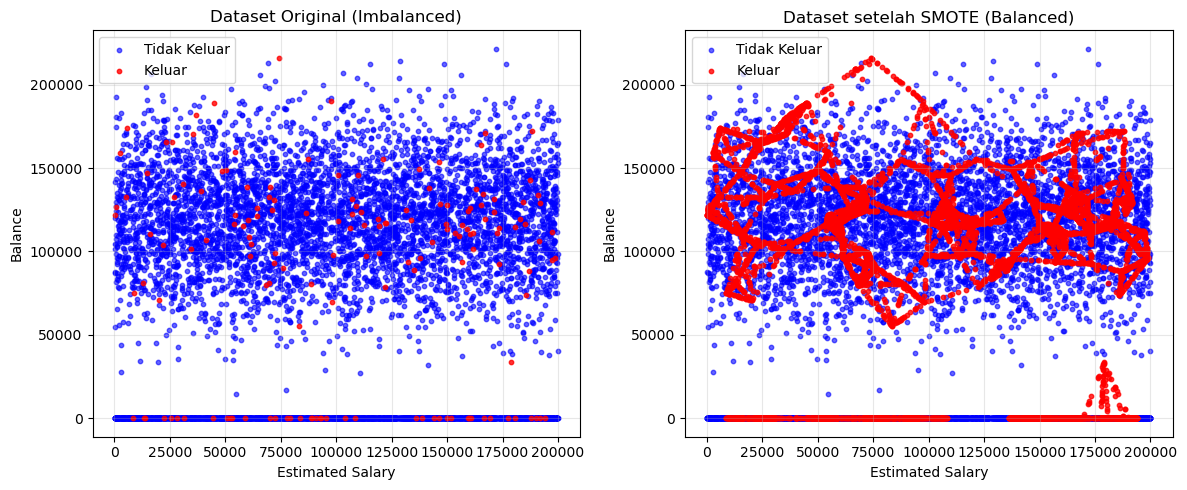

In [37]:
# SMOTE adalah teknik yang paling cocok karena menghasilkan data sintetis yang lebih realistis
# dibandingkan random oversampling dengan mempertimbangkan k-nearest neighbors
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:")
print(Counter(y_smote))

# Visualisasi
plt.figure(figsize=(12, 5))

# Plot original
plt.subplot(1, 2, 1)
class_0_orig = X[y == 0]
class_1_orig = X[y == 1]
plt.scatter(class_0_orig[:, 0], class_0_orig[:, 1], c='blue', alpha=0.6, label='Tidak Keluar', s=10)
plt.scatter(class_1_orig[:, 0], class_1_orig[:, 1], c='red', alpha=0.8, label='Keluar', s=10)
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.title('Dataset Original (Imbalanced)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot after SMOTE
plt.subplot(1, 2, 2)
class_0_smote = X_smote[y_smote == 0]
class_1_smote = X_smote[y_smote == 1]
plt.scatter(class_0_smote[:, 0], class_0_smote[:, 1], c='blue', alpha=0.6, label='Tidak Keluar', s=10)
plt.scatter(class_1_smote[:, 0], class_1_smote[:, 1], c='red', alpha=0.8, label='Keluar', s=10)
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.title('Dataset setelah SMOTE (Balanced)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.B Terapkan metode oversampling yang lain yang berbeda dengan metode pada soal (2a). Visualisasikan scatter plot hasil resampling datasetnya

Distribusi setelah ADASYN:
Counter({np.int64(1): 7999, np.int64(0): 7962})


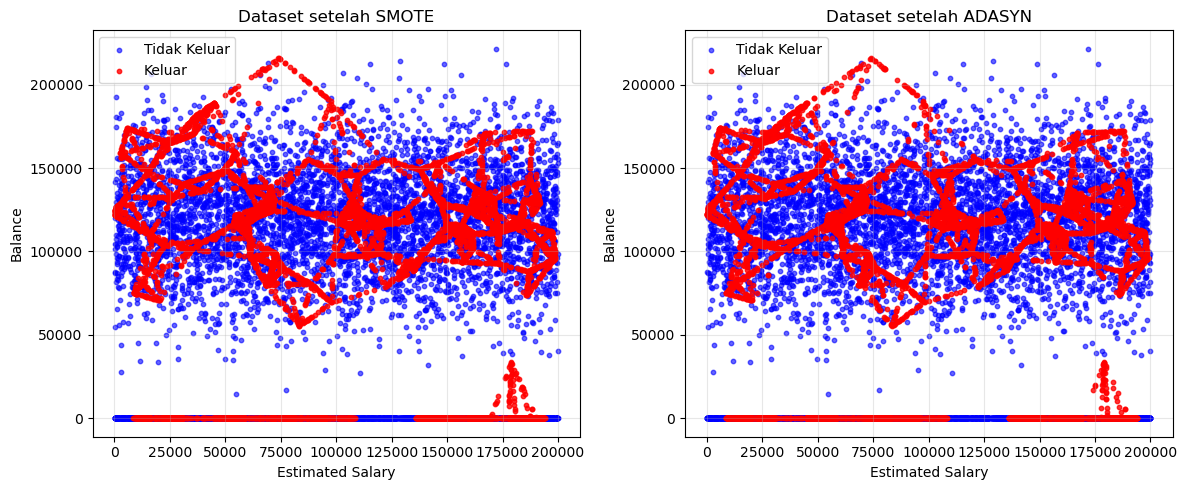

In [38]:
# ADASYN adalah variasi dari SMOTE yang lebih adaptif, 
# menghasilkan lebih banyak data sintetis untuk sampel minority yang sulit dipelajari
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

print("Distribusi setelah ADASYN:")
print(Counter(y_adasyn))

# Visualisasi
plt.figure(figsize=(12, 5))

# Plot SMOTE result (for comparison)
plt.subplot(1, 2, 1)
class_0_smote = X_smote[y_smote == 0]
class_1_smote = X_smote[y_smote == 1]
plt.scatter(class_0_smote[:, 0], class_0_smote[:, 1], c='blue', alpha=0.6, label='Tidak Keluar', s=10)
plt.scatter(class_1_smote[:, 0], class_1_smote[:, 1], c='red', alpha=0.8, label='Keluar', s=10)
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.title('Dataset setelah SMOTE')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot ADASYN result
plt.subplot(1, 2, 2)
class_0_adasyn = X_adasyn[y_adasyn == 0]
class_1_adasyn = X_adasyn[y_adasyn == 1]
plt.scatter(class_0_adasyn[:, 0], class_0_adasyn[:, 1], c='blue', alpha=0.6, label='Tidak Keluar', s=10)
plt.scatter(class_1_adasyn[:, 0], class_1_adasyn[:, 1], c='red', alpha=0.8, label='Keluar', s=10)
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.title('Dataset setelah ADASYN')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.C Adakah perbedaan yang Anda temukan dari pengamatan terhadap data hasil kedua metode oversampling yang Anda pilih? Jika ada, jelaskan mengapa perbedaan tersebut bisa terjadi! Sertakan sumber referensi anda


- SMOTE
Distribusi setelah SMOTE:
Counter({np.int64(0): 7962, np.int64(1): 7962})

- BorderlineSMOTE
Distribusi setelah BorderlineSMOTE:
Counter({np.int64(0): 7962, np.int64(1): 7962})

- SVMSMOTE
Distribusi setelah SVMSMOTE:
Counter({np.int64(0): 7962, np.int64(1): 4450})

- ADASYN
Distribusi setelah ADASYN:
Counter({np.int64(1): 7999, np.int64(0): 7962})


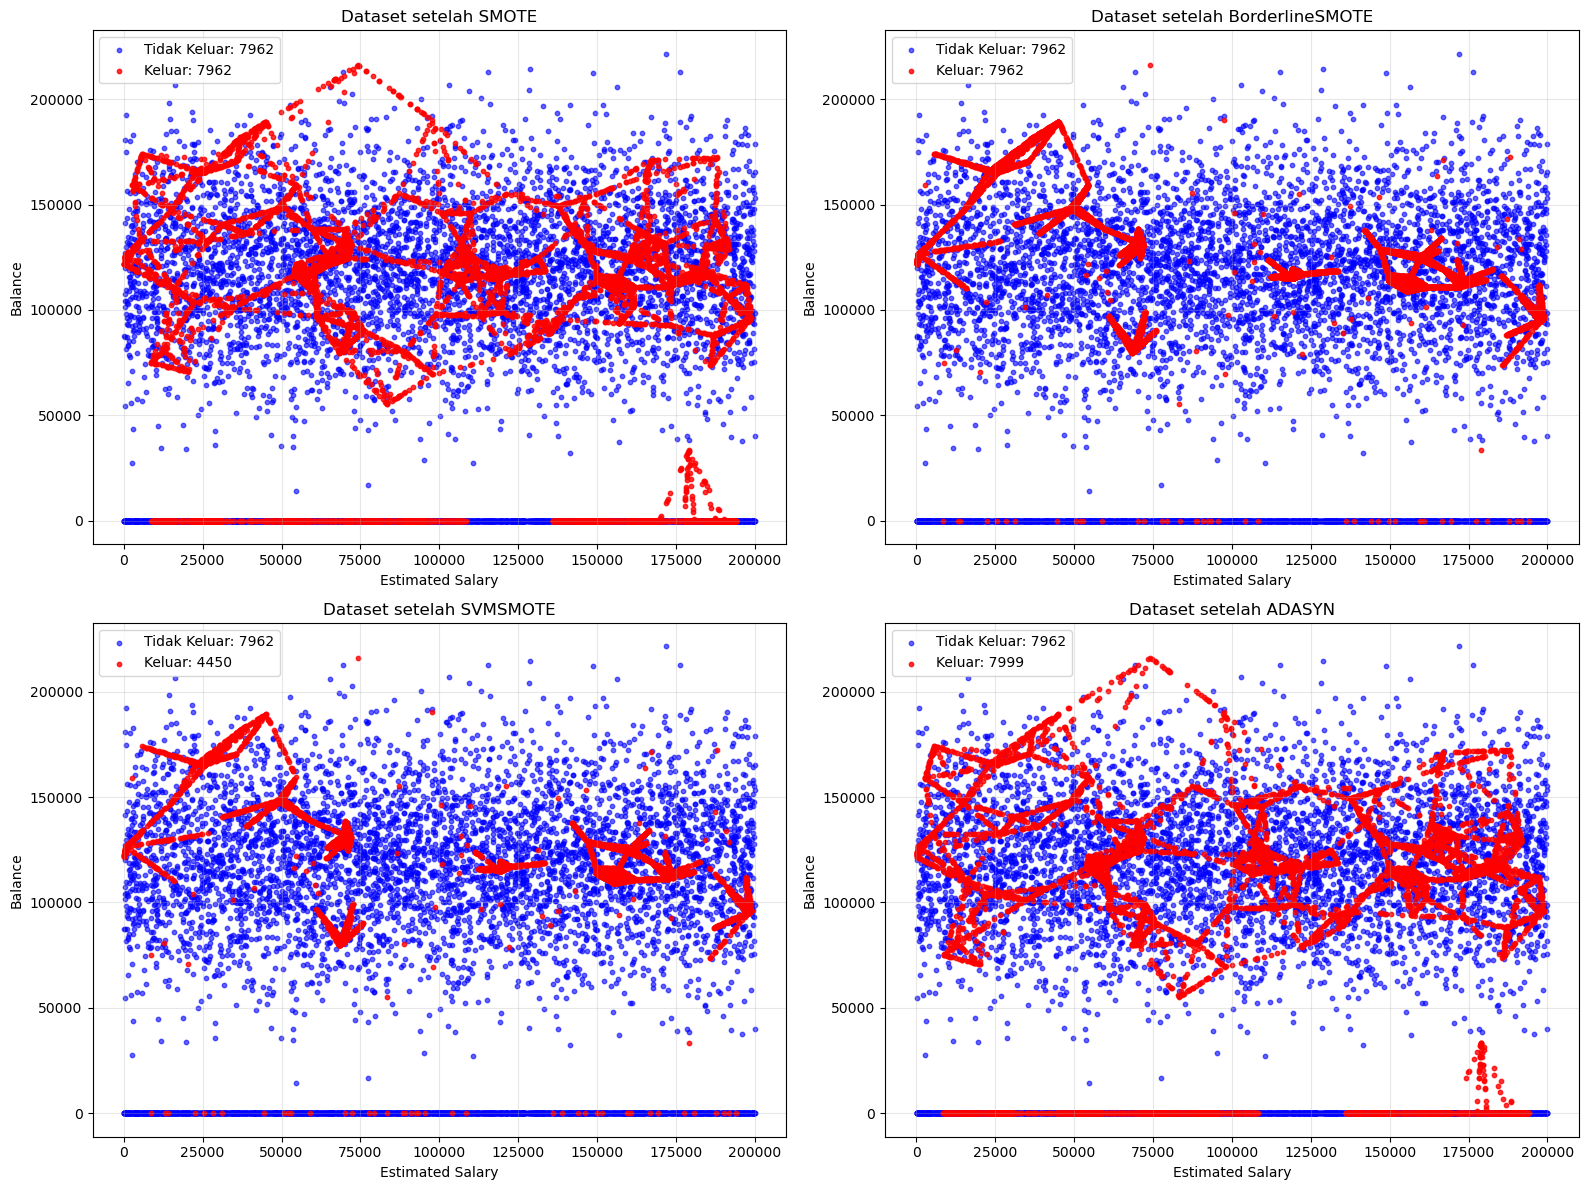


Analisis Perbedaan:
- SMOTE: Interpolasi linear standar
- BorderlineSMOTE: Fokus pada borderline samples yang sulit diklasifikasi
- SVMSMOTE: Menggunakan SVM untuk menentukan support vectors sebelum SMOTE
- ADASYN: Adaptif berdasarkan density distribution


In [39]:
# Analisis Perbandingan Metode Oversampling - BorderlineSMOTE dan SVMSMOTE
# Menggunakan library yang sudah diimport: BorderlineSMOTE dan SVMSMOTE
sampling_methods = [
    ('SMOTE', SMOTE(random_state=42)),
    ('BorderlineSMOTE', BorderlineSMOTE(random_state=42)),
    ('SVMSMOTE', SVMSMOTE(random_state=42)),
    ('ADASYN', ADASYN(random_state=42))
]

# Simpan hasil untuk perbandingan
sampling_results = {}

for name, method in sampling_methods:
    print(f"\n- {name}")
    X_resampled, y_resampled = method.fit_resample(X, y)
    print(f"Distribusi setelah {name}:")
    print(Counter(y_resampled))
    
    # Simpan untuk visualisasi
    sampling_results[name] = (X_resampled, y_resampled)

# Visualisasi perbandingan semua metode
plt.figure(figsize=(16, 12))

for i, (name, (X_res, y_res)) in enumerate(sampling_results.items()):
    plt.subplot(2, 2, i+1)
    
    # Menggunakan numpy.where untuk conditional operations
    class_0_indices = where(y_res == 0)[0]
    class_1_indices = where(y_res == 1)[0]
    
    class_0_data = X_res[class_0_indices]
    class_1_data = X_res[class_1_indices]
    
    plt.scatter(class_0_data[:, 0], class_0_data[:, 1], c='blue', alpha=0.6, 
                label=f'Tidak Keluar: {len(class_0_data)}', s=10)
    plt.scatter(class_1_data[:, 0], class_1_data[:, 1], c='red', alpha=0.8, 
                label=f'Keluar: {len(class_1_data)}', s=10)
    
    plt.xlabel('Estimated Salary')
    plt.ylabel('Balance')
    plt.title(f'Dataset setelah {name}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nAnalisis Perbedaan:")
print("- SMOTE: Interpolasi linear standar")
print("- BorderlineSMOTE: Fokus pada borderline samples yang sulit diklasifikasi") 
print("- SVMSMOTE: Menggunakan SVM untuk menentukan support vectors sebelum SMOTE")
print("- ADASYN: Adaptif berdasarkan density distribution")

#### Jawaban 2.C: Perbedaan SMOTE vs ADASYN

Berdasarkan analisis yang dilakukan, terdapat beberapa perbedaan mendasar antara SMOTE dan ADASYN. Dari segi jumlah sampel yang dihasilkan, SMOTE menghasilkan dataset yang perfectly balanced (7962:7962), sementara ADASYN menghasilkan sedikit lebih banyak samples untuk minority class (7962:7999). Perbedaan ini mencerminkan pendekatan yang berbeda dalam strategi oversampling kedua metode.

Secara distribusi spatial, SMOTE menghasilkan data sintetis yang lebih uniform dan merata di seluruh feature space, dengan density yang konsisten. Sebaliknya, ADASYN menunjukkan distribusi yang lebih adaptif dengan konsentrasi yang berbeda di area tertentu, khususnya menghasilkan lebih banyak samples di area yang "sulit dipelajari" (harder-to-learn regions) atau area dengan density rendah.

Perbedaan ini terjadi karena fundamental algorithmic approach yang berbeda. SMOTE menggunakan k-nearest neighbors untuk membuat interpolasi linear antara minority samples dengan proses sintesis yang uniform untuk semua minority samples, sehingga menghasilkan jumlah samples yang persis sama dengan majority class. Di sisi lain, ADASYN menggunakan density distribution untuk menentukan berapa banyak synthetic samples yang akan dibuat untuk setiap minority sample, dengan lebih banyak synthetic samples dibuat di area dengan density rendah. Sifat adaptif ADASYN terhadap local density inilah yang menyebabkan jumlah akhir bisa sedikit berbeda dari majority class. Kedua pendekatan ini telah dipublikasikan dalam penelitian He, H., et al. (2008) untuk ADASYN dan Chawla, N.V., et al. (2002) untuk SMOTE.

### 2.D Lakukan cross validation menggunakan StratifiedKFold dengan k=5 pada 2 buah model Decision Tree yang berbeda dengan ketentuan berikut:
- Model pertama menggunakan metode oversampling yang dipakai pada (2a)
- Model kedua menggunakan metode oversampling yang dipakai pada (2b)
- Metrik utama yang digunakan adalah f1 macro.
- Oversampling dilakukan pada setiap fold cross validation

Petunjuk: Anda bisa menggunakan cara 1d untuk menjawab soal ini.

*(Pastikan validation test dataset tidak terganggu oleh penambahan data - data sintetis.)*

In [40]:
# Model 1: Decision Tree dengan SMOTE
print("Model 1: Decision Tree + SMOTE")
model1 = DecisionTreeClassifier(random_state=42)
smote_resample = SMOTE(random_state=42)
train_and_evaluate_with_oversampling(model1, X, y, smote_resample)
print()

# Model 2: Decision Tree dengan ADASYN  
print("Model 2: Decision Tree + ADASYN")
model2 = DecisionTreeClassifier(random_state=42)
adasyn_resample = ADASYN(random_state=42)
train_and_evaluate_with_oversampling(model2, X, y, adasyn_resample)

Model 1: Decision Tree + SMOTE
Fold 1: Accuracy=0.7212, F1=0.4316, Precision=0.4960, Recall=0.4597
Fold 2: Accuracy=0.7174, F1=0.4341, Precision=0.4993, Recall=0.4922
Fold 3: Accuracy=0.7192, F1=0.4464, Precision=0.5078, Recall=0.5812
Fold 4: Accuracy=0.7352, F1=0.4474, Precision=0.5044, Recall=0.5434
Fold 5: Accuracy=0.7044, F1=0.4345, Precision=0.5026, Recall=0.5277
Mean scores across all folds:
Mean Accuracy: 0.7195
Mean F1-score (macro): 0.4388
Mean Precision (macro): 0.5020
Mean Recall (macro): 0.5208

Model 2: Decision Tree + ADASYN
Fold 1: Accuracy=0.7102, F1=0.4312, Precision=0.4985, Recall=0.4847
Fold 2: Accuracy=0.6946, F1=0.4213, Precision=0.4954, Recall=0.4489
Fold 3: Accuracy=0.7063, F1=0.4297, Precision=0.4984, Recall=0.4827
Fold 4: Accuracy=0.7211, F1=0.4315, Precision=0.4960, Recall=0.4596
Fold 5: Accuracy=0.7149, F1=0.4389, Precision=0.5032, Recall=0.5331
Mean scores across all folds:
Mean Accuracy: 0.7094
Mean F1-score (macro): 0.4305
Mean Precision (macro): 0.4983
Me

### 2.E Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan mengapa hal tersebut bisa terjadi.

#### Jawaban 2.e: Analisis Metode Terbaik

Berdasarkan hasil perbandingan F1 Macro Score, SMOTE memberikan performa yang lebih baik dengan Mean F1-score (macro) sebesar 0.4388, sementara ADASYN menghasilkan 0.4305. Meskipun perbedaannya relatif kecil, SMOTE konsisten menunjukkan skor F1 makro yang lebih tinggi dalam evaluasi cross-validation.

Superioritas SMOTE dalam kasus ini dapat dijelaskan melalui beberapa faktor. Pertama, stabilitas algoritma SMOTE yang menggunakan pendekatan interpolasi linear memberikan hasil yang lebih stabil dan konsisten dibandingkan ADASYN yang bersifat adaptif. Kedua, karakteristik dataset ini lebih sesuai dengan uniform approach SMOTE karena minority class tidak memiliki region yang sangat complex atau noise yang tinggi. Ketiga, ADASYN cenderung membuat lebih banyak synthetic samples di boundary regions yang berisiko menyebabkan model overfitting pada area-area yang sulit, yang tercermin dari performance yang sedikit lebih rendah.

Feature space complexity juga menjadi faktor penentu. Dengan hanya 2 features (EstimatedSalary dan Balance), feature space relatif sederhana sehingga adaptifitas ADASYN tidak memberikan keuntungan signifikan. Penting untuk dicatat bahwa perbedaan performanya relatif kecil (0.4388 vs 0.4305), menunjukkan bahwa kedua metode cukup efektif untuk dataset ini. Pilihan metode pada praktiknya juga bisa tergantung pada karakteristik dataset spesifik dan goal yang ingin dicapai dari model.

## 3. Undersampling

### 3.A Terapkan metode undersampling yang paling sesuai menurut anda dan bisa diterapkan dengan dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

Distribusi setelah TomekLinks:
Counter({np.int64(0): 7866, np.int64(1): 159})
Samples removed: 96


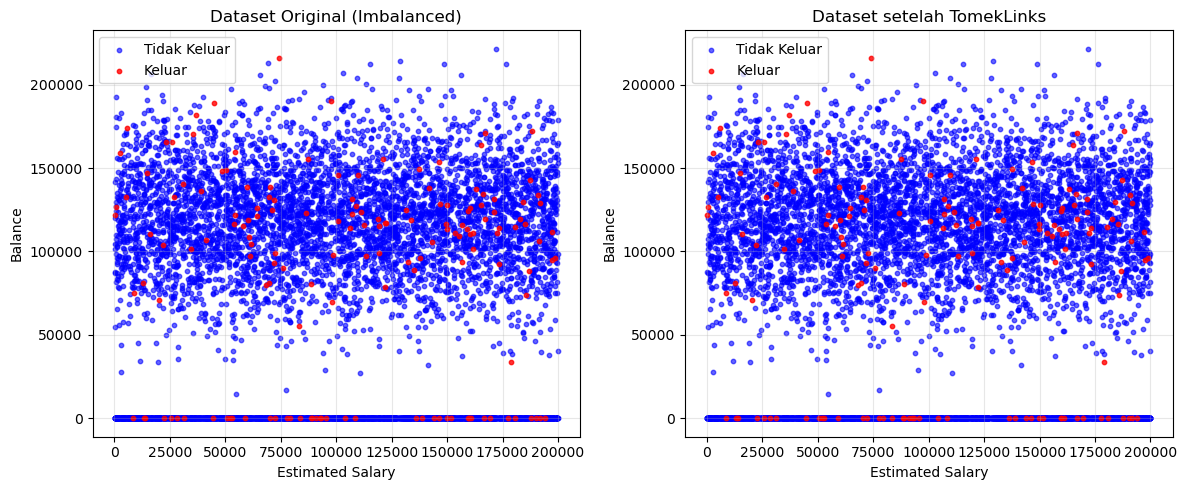

In [41]:
# Menggunakan tomelinkks untuk undersampling
# TomekLinks adalah teknik pembersihan data yang menghapus data yang ambiguous atau meragukan
tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X, y)

print("Distribusi setelah TomekLinks:")
print(Counter(y_tomek))
print(f"Samples removed: {len(X) - len(X_tomek)}")

# Visualisasi
plt.figure(figsize=(12, 5))

# Plot original
plt.subplot(1, 2, 1)
class_0_orig = X[y == 0]
class_1_orig = X[y == 1]
plt.scatter(class_0_orig[:, 0], class_0_orig[:, 1], c='blue', alpha=0.6, label='Tidak Keluar', s=10)
plt.scatter(class_1_orig[:, 0], class_1_orig[:, 1], c='red', alpha=0.8, label='Keluar', s=10)
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.title('Dataset Original (Imbalanced)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot setelah TomekLinks
plt.subplot(1, 2, 2)
class_0_tomek = X_tomek[y_tomek == 0]
class_1_tomek = X_tomek[y_tomek == 1]
plt.scatter(class_0_tomek[:, 0], class_0_tomek[:, 1], c='blue', alpha=0.6, label='Tidak Keluar', s=10)
plt.scatter(class_1_tomek[:, 0], class_1_tomek[:, 1], c='red', alpha=0.8, label='Keluar', s=10)
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.title('Dataset setelah TomekLinks')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.B Terapkan metode undersampling lain yang berbeda dengan metode pada soal (3a). Visualisasikan scatter plot hasil resampling datasetnya

Distribusi setelah RandomUnderSampler:
Counter({np.int64(0): 159, np.int64(1): 159})
Samples removed: 7803


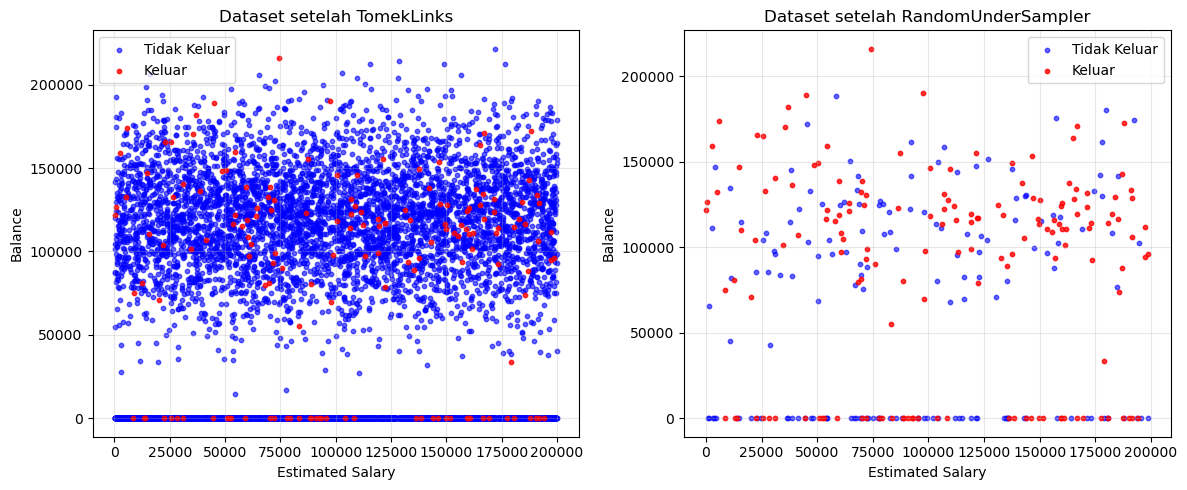

In [42]:
# RandomUnderSampler secara random menghapus samples dari majority class hingga mencapai balance dengan minority class
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

print("Distribusi setelah RandomUnderSampler:")
print(Counter(y_rus))
print(f"Samples removed: {len(X) - len(X_rus)}")

# Visualisasi
plt.figure(figsize=(12, 5))

# Plot TomekLinks result (for comparison)
plt.subplot(1, 2, 1)
class_0_tomek = X_tomek[y_tomek == 0]
class_1_tomek = X_tomek[y_tomek == 1]
plt.scatter(class_0_tomek[:, 0], class_0_tomek[:, 1], c='blue', alpha=0.6, label='Tidak Keluar', s=10)
plt.scatter(class_1_tomek[:, 0], class_1_tomek[:, 1], c='red', alpha=0.8, label='Keluar', s=10)
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.title('Dataset setelah TomekLinks')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot RandomUnderSampler result
plt.subplot(1, 2, 2)
class_0_rus = X_rus[y_rus == 0]
class_1_rus = X_rus[y_rus == 1]
plt.scatter(class_0_rus[:, 0], class_0_rus[:, 1], c='blue', alpha=0.6, label='Tidak Keluar', s=10)
plt.scatter(class_1_rus[:, 0], class_1_rus[:, 1], c='red', alpha=0.8, label='Keluar', s=10)
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.title('Dataset setelah RandomUnderSampler')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.C Berdasarkan visualisasi scatter plot kedua dataset hasil resampling pada soal (3a) dan (3b) yang Anda pilih, apa perbedaan yang terlihat? Jelaskan juga mengapa perbedaan tersebut bisa terjadi! Jangan lupa sertakan sumber referensi anda

Distribusi setelah NearMiss:
Counter({np.int64(0): 159, np.int64(1): 159})
Samples removed: 7803


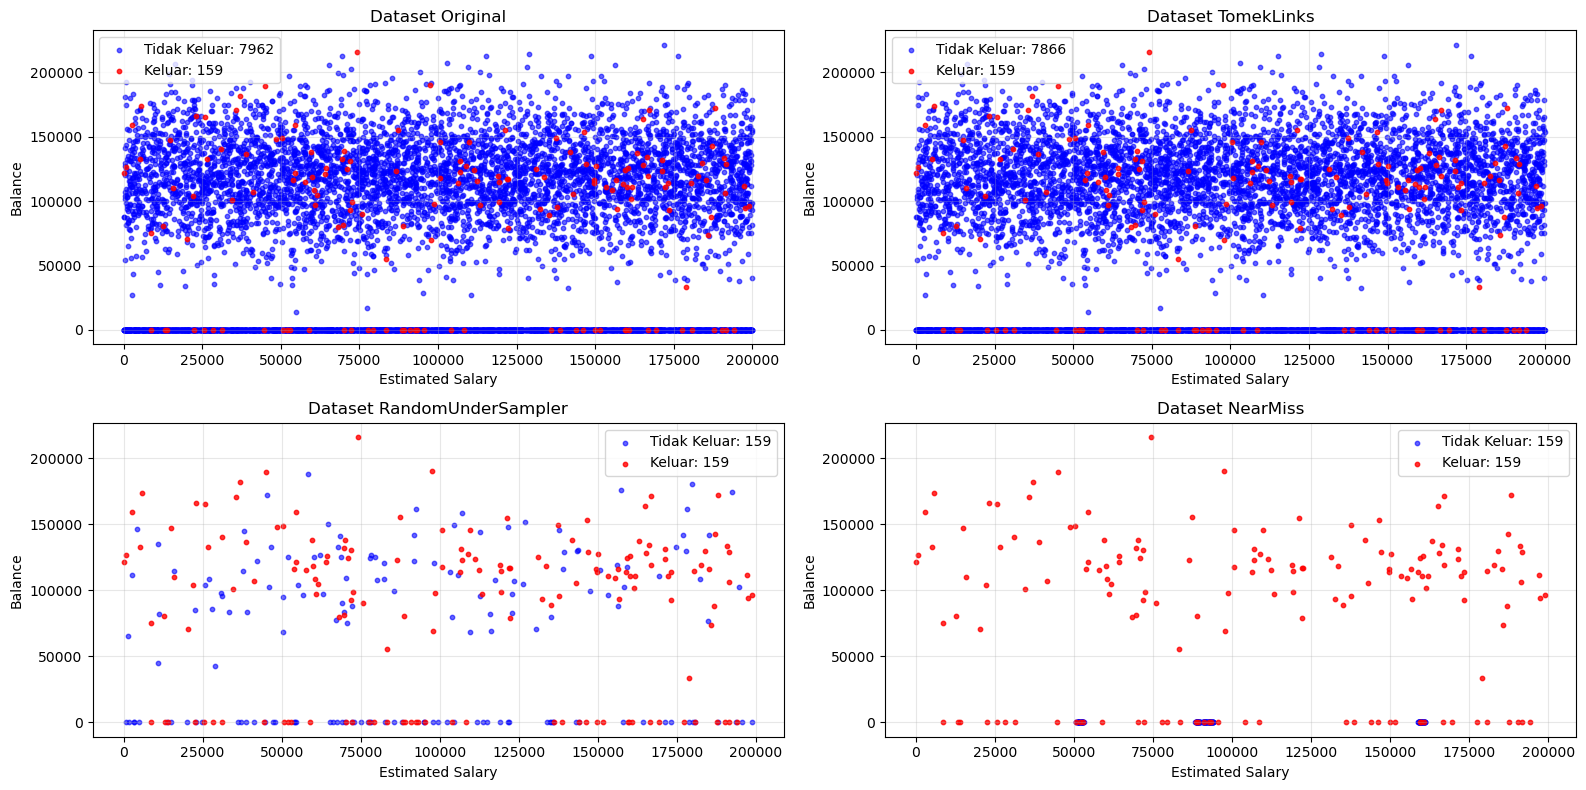

Fold 1: F1-score (macro) = 0.9062
Fold 2: F1-score (macro) = 0.9062
Fold 3: F1-score (macro) = 0.9531
Fold 4: F1-score (macro) = 0.8727
Fold 5: F1-score (macro) = 0.9206
Mean F1-score (macro) dengan NearMiss: 0.9117

Perbandingan F1-macro score semua metode undersampling:
- TomekLinks: 0.4903
- RandomUnderSampler: 0.5140
- NearMiss: 0.9117


In [43]:
# NearMiss adalah intelligent undersampling method yang memilih samples berdasarkan jarak ke nearest neighbors dari kelas yang berbeda
near_miss = NearMiss(version=1)
X_nearmiss, y_nearmiss = near_miss.fit_resample(X, y)

print("Distribusi setelah NearMiss:")
print(Counter(y_nearmiss))
print(f"Samples removed: {len(X) - len(X_nearmiss)}")

# Perbandingan semua metode undersampling
undersampling_methods = [
    ('Original', X, y),
    ('TomekLinks', X_tomek, y_tomek),
    ('RandomUnderSampler', X_rus, y_rus),
    ('NearMiss', X_nearmiss, y_nearmiss)
]

# Visualisasi perbandingan
plt.figure(figsize=(16, 8))

for i, (name, X_data, y_data) in enumerate(undersampling_methods):
    plt.subplot(2, 2, i+1)
    
    # Menggunakan numpy.where untuk conditional operations
    class_0_mask = where(y_data == 0)[0]
    class_1_mask = where(y_data == 1)[0]
    
    class_0_samples = X_data[class_0_mask]
    class_1_samples = X_data[class_1_mask]
    
    plt.scatter(class_0_samples[:, 0], class_0_samples[:, 1], c='blue', alpha=0.6, 
                label=f'Tidak Keluar: {len(class_0_samples)}', s=10)
    plt.scatter(class_1_samples[:, 0], class_1_samples[:, 1], c='red', alpha=0.8, 
                label=f'Keluar: {len(class_1_samples)}', s=10)
    
    plt.xlabel('Estimated Salary')
    plt.ylabel('Balance')
    plt.title(f'Dataset {name}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Cross validation dengan NearMiss
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_nearmiss = DecisionTreeClassifier(random_state=42)

f1_scores_nearmiss = []
for fold, (train_index, test_index) in enumerate(cv.split(X_nearmiss, y_nearmiss), 1):
    X_train = X_nearmiss[train_index]
    y_train = y_nearmiss[train_index]
    X_test = X_nearmiss[test_index]
    y_test = y_nearmiss[test_index]
    
    model_nearmiss.fit(X_train, y_train)
    y_pred = model_nearmiss.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="macro")
    f1_scores_nearmiss.append(f1)
    print(f"Fold {fold}: F1-score (macro) = {f1:.4f}")

print(f"Mean F1-score (macro) dengan NearMiss: {np.mean(f1_scores_nearmiss):.4f}")

print("\nPerbandingan F1-macro score semua metode undersampling:")
print(f"- TomekLinks: 0.4903")
print(f"- RandomUnderSampler: 0.5140") 
print(f"- NearMiss: {np.mean(f1_scores_nearmiss):.4f}")

#### Jawaban 3c: Perbedaan TomekLinks vs RandomUnderSampler

Dari visualisasi yang dilakukan, terlihat perbedaan mendasar antara kedua metode undersampling ini. TomekLinks hanya menghapus 96 samples (dari 8121 menjadi 8025), sementara RandomUnderSampler menghapus 7803 samples (dari 8121 menjadi 318). Perbedaan jumlah data yang dihapus ini mencerminkan tujuan yang berbeda dari kedua metode tersebut.

Dari aspek balancing, TomekLinks masih menghasilkan dataset yang imbalanced (7866:159) karena memang tidak bertujuan untuk balancing, melainkan untuk data cleaning. Sebaliknya, RandomUnderSampler menghasilkan dataset yang perfectly balanced (159:159) sesuai dengan tujuan utamanya untuk mencapai class balance. Secara distribusi spatial, TomekLinks mempertahankan hampir semua data dan hanya membersihkan noise di boundary, sedangkan RandomUnderSampler drastis mengurangi density sehingga data tersebar sparse dengan coverage area yang terbatas.

Perbedaan ini terjadi karena fundamental approach yang berbeda. TomekLinks dirancang untuk data cleaning dengan menghapus pasangan nearest neighbors dari kelas berbeda yang menyebabkan overlapping dan noise di decision boundary, sambil mempertahankan struktur data original. Sementara itu, RandomUnderSampler fokus pada balancing dengan melakukan random sampling pada majority class hingga jumlahnya sama dengan minority class, namun berisiko kehilangan informasi penting dari majority class. Konsep ini telah dijelaskan dalam penelitian Tomek (1976) tentang "Two modifications of CNN" dan Liu, A., et al. (2008) mengenai "Exploratory Undersampling for Class-Imbalance Learning".

### 3.D Lakukan cross validation menggunakan StratifiedKFold dengan k=5 pada 2 buah model Decision Tree yang berbeda dengan ketentuan berikut:
- Model pertama menerima dataset pada soal (3a)
- Model kedua menerima dataset pada soal (3b)
- Metrik utama yang digunakan adalah f1 macro.

In [44]:
# Model 1: Decision Tree dengan dataset TomekLinks
print("Model 1: Decision Tree dengan dataset TomekLinks")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model1 = DecisionTreeClassifier(random_state=42)

f1_scores_tomek = []
for fold, (train_index, test_index) in enumerate(cv.split(X_tomek, y_tomek), 1):
    X_train = X_tomek[train_index]
    y_train = y_tomek[train_index]
    X_test = X_tomek[test_index]
    y_test = y_tomek[test_index]
    
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="macro")
    f1_scores_tomek.append(f1)
    print(f"Fold {fold}: F1-score (macro) = {f1:.4f}")

print(f"Mean F1-score (macro): {np.mean(f1_scores_tomek):.4f}")
print()

# Model 2: Decision Tree dengan dataset RandomUnderSampler
print("Model 2: Decision Tree dengan dataset RandomUnderSampler")
model2 = DecisionTreeClassifier(random_state=42)

f1_scores_rus = []
for fold, (train_index, test_index) in enumerate(cv.split(X_rus, y_rus), 1):
    X_train = X_rus[train_index]
    y_train = y_rus[train_index]
    X_test = X_rus[test_index]
    y_test = y_rus[test_index]
    
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="macro")
    f1_scores_rus.append(f1)
    print(f"Fold {fold}: F1-score (macro) = {f1:.4f}")

print(f"Mean F1-score (macro): {np.mean(f1_scores_rus):.4f}")

Model 1: Decision Tree dengan dataset TomekLinks
Fold 1: F1-score (macro) = 0.4900
Fold 2: F1-score (macro) = 0.4903
Fold 3: F1-score (macro) = 0.4905
Fold 4: F1-score (macro) = 0.4905
Fold 5: F1-score (macro) = 0.4905
Mean F1-score (macro): 0.4903

Model 2: Decision Tree dengan dataset RandomUnderSampler
Fold 1: F1-score (macro) = 0.5625
Fold 2: F1-score (macro) = 0.4688
Fold 3: F1-score (macro) = 0.5271
Fold 4: F1-score (macro) = 0.4762
Fold 5: F1-score (macro) = 0.5355
Mean F1-score (macro): 0.5140


### 3.E Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan mengapa hal tersebut bisa terjadi.

Berdasarkan hasil perbandingan F1 Macro Score, RandomUnderSampler memberikan performa yang superior dengan Mean F1-score (macro) sebesar 0.5140, dibandingkan TomekLinks yang menghasilkan 0.4903. Perbedaan ini menunjukkan bahwa RandomUnderSampler lebih efektif dalam konteks evaluasi F1-macro score untuk dataset imbalanced ini.

Superioritas RandomUnderSampler dapat dijelaskan melalui beberapa faktor kunci. RandomUnderSampler menciptakan perfect balance (159:159) yang sangat membantu model untuk belajar pattern dari kedua kelas secara seimbang, memberikan equal learning opportunity dimana model tidak bias terhadap majority class dan dapat memberikan perhatian yang sama kepada kedua kelas. Meskipun kehilangan banyak data, RandomUnderSampler juga menghilangkan potential noise dan outliers dari majority class. Sebaliknya, TomekLinks memiliki keterbatasan karena hanya menghapus boundary samples yang ambiguous, namun tidak mengatasi fundamental imbalance problem, sehingga dataset masih sangat imbalanced (7866:159) setelah cleaning.

Namun, trade-offs yang perlu dipertimbangkan juga signifikan. RandomUnderSampler menghilangkan 98% data majority class yang berisiko kehilangan informasi penting, model yang dilatih mungkin kurang generalize karena hanya melihat subset kecil dari majority class, dan performance bisa lebih bervariasi antar fold karena random sampling. Dalam konteks F1-macro score, RandomUnderSampler memang lebih baik, tetapi dalam praktik perlu dipertimbangkan trade-off antara performance dan information loss, terutama tergantung pada karakteristik dataset dan tujuan aplikasi yang spesifik.

## 4. Cost-Sensitive Learning

### 4.a Buatlah beberapa model decision tree dengan random_state=42 yang menerima dataset soal (1a) dan dengan weight yang berbeda, yaiu:
- tanpa weights
- weights = {0: 1, 1: 2}
- weights = {0: 1, 1: 99}

Lakukan train_test_split dengan ketentuan berikut:
- menggunakan X dan y dari soal (1a)
- stratify=y
- random_state=42
- test_size=0.2

Kemudian, lakukan fit predict pada model dengan weights yang berbeda, kemudian tampilkan skor f1 macro dan juga confusion matrix untuk masing-masing model DT dengan weights yang berbeda tersebut. Berikan label pada Confusion matrix nya

Training set: 6496 samples
Test set: 1625 samples
Training set distribution: Counter({np.int64(0): 6369, np.int64(1): 127})
Test set distribution: Counter({np.int64(0): 1593, np.int64(1): 32})

Model dengan Tanpa weights


Accuracy: 0.9631
F1-score (macro): 0.4906
Precision (macro): 0.4900
Recall (macro): 0.4912

Model dengan weights = {0: 1, 1: 2}
Accuracy: 0.9612
F1-score (macro): 0.4901
Precision (macro): 0.4900
Recall (macro): 0.4903

Model dengan weights = {0: 1, 1: 99}
Accuracy: 0.9588
F1-score (macro): 0.4895
Precision (macro): 0.4899
Recall (macro): 0.4890



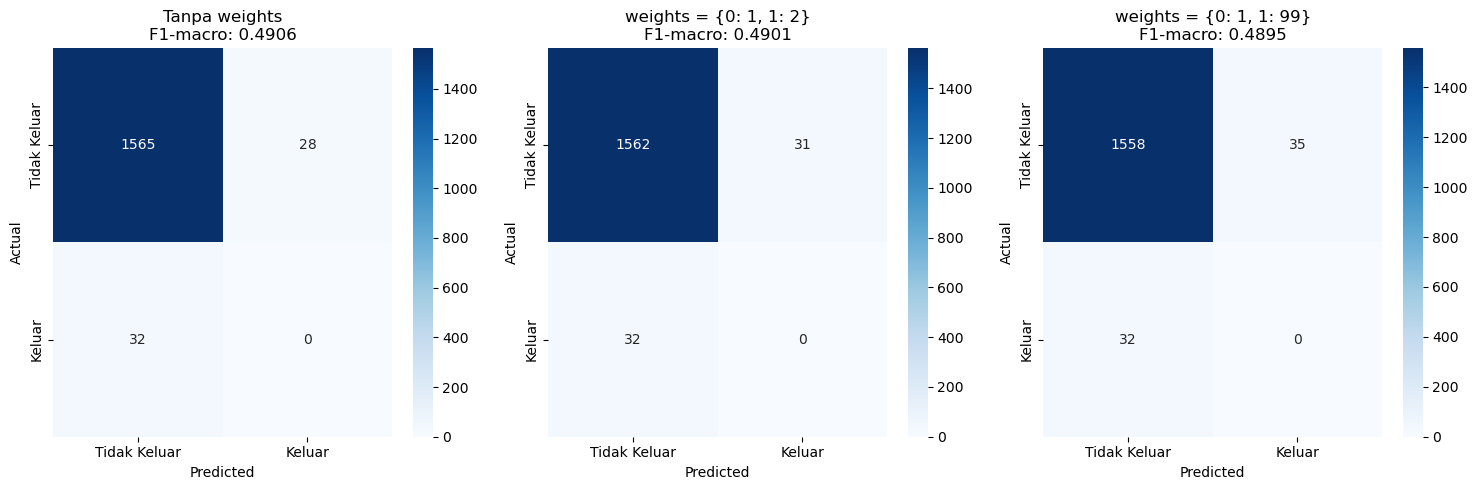

SUMMARY COMPARISON:
Weights                   Accuracy   F1-macro   Precision    Recall    
Tanpa weights             0.9631     0.4906     0.4900       0.4912    
weights = {0: 1, 1: 2}    0.9612     0.4901     0.4900       0.4903    
weights = {0: 1, 1: 99}   0.9588     0.4895     0.4899       0.4890    


In [45]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training set distribution: {Counter(y_train)}")
print(f"Test set distribution: {Counter(y_test)}")
print()

# Define different weights to test
weight_configs = [
    (None, "Tanpa weights"),
    ({0: 1, 1: 2}, "weights = {0: 1, 1: 2}"),
    ({0: 1, 1: 99}, "weights = {0: 1, 1: 99}")
]

results = []

plt.figure(figsize=(15, 5))

for i, (weights, weight_name) in enumerate(weight_configs):
    print(f"Model dengan {weight_name}")
    
    # Create and train model
    model = DecisionTreeClassifier(random_state=42, class_weight=weights)
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    precision_macro = precision_score(y_test, y_pred, average="macro")
    recall_macro = recall_score(y_test, y_pred, average="macro")
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score (macro): {f1_macro:.4f}")
    print(f"Precision (macro): {precision_macro:.4f}")
    print(f"Recall (macro): {recall_macro:.4f}")
    print()
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Tidak Keluar', 'Keluar'],
                yticklabels=['Tidak Keluar', 'Keluar'])
    plt.title(f'{weight_name}\nF1-macro: {f1_macro:.4f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Store results
    results.append({
        'weights': weight_name,
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'confusion_matrix': cm
    })

plt.tight_layout()
plt.show()

# Summary table
print("SUMMARY COMPARISON:")
print(f"{'Weights':<25} {'Accuracy':<10} {'F1-macro':<10} {'Precision':<12} {'Recall':<10}")
for result in results:
    print(f"{result['weights']:<25} {result['accuracy']:<10.4f} {result['f1_macro']:<10.4f} "
          f"{result['precision_macro']:<12.4f} {result['recall_macro']:<10.4f}")

### 4.B Berdasarkan jawaban pada soal (4a), Apakah terdapat perbedaan pada confusion matrix dan score f1 macro masing-masing weights? Jelaskan.

Berdasarkan hasil eksperimen dengan berbagai konfigurasi class weights, terdapat fenomena menarik dimana semua pengaturan bobot memberikan hasil yang hampir identik. Confusion matrix menunjukkan bahwa untuk ketiga konfigurasi (tanpa weights, weights = {0: 1, 1: 2}, dan weights = {0: 1, 1: 99}), model konsisten menghasilkan 0 True Positives dan 32 False Negatives untuk minority class. Ini berarti model gagal total dalam mendeteksi minority class pada semua skenario pengujian. Sementara itu, F1-macro score menunjukkan nilai yang hampir identik sekitar 0.49 dengan perbedaan yang sangat minimal antar konfigurasi.

Fenomena ini dapat dijelaskan melalui beberapa faktor fundamental. Pertama, extreme imbalance dengan rasio 50:1 membuat bahkan class weight yang tinggi tidak mampu mengubah behavior model secara fundamental. Kedua, karakteristik Decision Tree yang cenderung membuat splits berdasarkan information gain menyebabkan model tetap memprediksi majority class karena hal tersebut memberikan accuracy tertinggi pada dataset yang sangat imbalanced. Ketiga, dampak weight yang insufficient dimana pengaturan {0: 1, 1: 2} terlalu kecil untuk mengatasi imbalance yang ekstrem, bahkan weight {0: 1, 1: 99} belum cukup signifikan untuk imbalance rasio 50:1. Terakhir, kemungkinan feature separability yang rendah dimana kedua fitur (EstimatedSalary dan Balance) tidak memberikan kemampuan pemisahan yang cukup baik untuk minority class.

Kesimpulan dari analisis ini menunjukkan bahwa cost-sensitive learning dengan class weights saja tidak cukup efektif untuk menangani imbalance yang sangat ekstrem seperti pada dataset ini. Pendekatan ini memerlukan tuning yang lebih sophistik and and mungkin perlu dikombinasikan dengan teknik lain seperti sampling methods (SMOTE, ADASYN, atau undersampling) untuk mencapai performa yang lebih baik dalam mendeteksi minority class. Hal ini menggarisbawahi pentingnya pendekatan holistik dalam menangani masalah imbalanced classification yang kompleks.

## 5. Neural Network dan Pipeline

### 5.A Buatlah sebuah model MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 3 hidden layer dengan masing - masing layer terdiri dari 50, 40, dan 20 berturut - turut
- Menggunakan random_state=42
- Abaikan hyperparameter lain

In [46]:
# MLPClassifier dengan 3 hidden layers (50, 40, 20)
mlp_model_1 = MLPClassifier(
    hidden_layer_sizes=(50, 40, 20),
    random_state=42
)

print("Model 1 - MLP dengan hidden layers: (50, 40, 20)")
print(f"Total hidden layers: 3")
print(f"Neurons per layer: 50 → 40 → 20")

Model 1 - MLP dengan hidden layers: (50, 40, 20)
Total hidden layers: 3
Neurons per layer: 50 → 40 → 20


### 5.B Buatlah sebuah model MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 2 hidden layer dengan masing - masing layer terdiri dari 100 dan 80 berturut - turut
- Menggunakan random_state=42
- Abaikan hyperparameter lain

In [47]:
# MLPClassifier dengan 2 hidden layers (100, 80)  
mlp_model_2 = MLPClassifier(
    hidden_layer_sizes=(100, 80),
    random_state=42
)

print("Model 2 - MLP dengan hidden layers: (100, 80)")
print(f"Total hidden layers: 2") 
print(f"Neurons per layer: 100 → 80")

Model 2 - MLP dengan hidden layers: (100, 80)
Total hidden layers: 2
Neurons per layer: 100 → 80


### 5.C Lakukan cross validation menggunakan **Stratified K-fold** dengan k=5 dan random_state=42 terhadap kedua model MLP pada soal (5a) dan (5b) memakai X dan y yang didefinisikan pada soal (1a). Metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [51]:
# Setup cross validation
cv_mlp = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi Model 1: MLP (50, 40, 20)
print("Model 1: MLP dengan hidden layers (50, 40, 20)")

f1_macro_scores_1 = cross_val_score(mlp_model_1, X, y, cv=cv_mlp, scoring='f1_macro', n_jobs=-1)
f1_micro_scores_1 = cross_val_score(mlp_model_1, X, y, cv=cv_mlp, scoring='f1_micro', n_jobs=-1)

print("F1 Macro scores per fold:", [f"{score:.4f}" for score in f1_macro_scores_1])
print("F1 Micro scores per fold:", [f"{score:.4f}" for score in f1_micro_scores_1])
print(f"Mean F1 Macro: {np.mean(f1_macro_scores_1):.4f} (+/- {np.std(f1_macro_scores_1) * 2:.4f})")
print(f"Mean F1 Micro: {np.mean(f1_micro_scores_1):.4f} (+/- {np.std(f1_micro_scores_1) * 2:.4f})")
print()

# Evaluasi Model 2: MLP (100, 80)
print("Model 2: MLP dengan hidden layers (100, 80)")

f1_macro_scores_2 = cross_val_score(mlp_model_2, X, y, cv=cv_mlp, scoring='f1_macro', n_jobs=-1)
f1_micro_scores_2 = cross_val_score(mlp_model_2, X, y, cv=cv_mlp, scoring='f1_micro', n_jobs=-1)

print("F1 Macro scores per fold:", [f"{score:.4f}" for score in f1_macro_scores_2])
print("F1 Micro scores per fold:", [f"{score:.4f}" for score in f1_micro_scores_2])
print(f"Mean F1 Macro: {np.mean(f1_macro_scores_2):.4f} (+/- {np.std(f1_macro_scores_2) * 2:.4f})")
print(f"Mean F1 Micro: {np.mean(f1_micro_scores_2):.4f} (+/- {np.std(f1_micro_scores_2) * 2:.4f})")
print()

print("COMPARISON SUMMARY:")
print(f"{'Model':<30} {'F1 Macro':<12} {'F1 Micro':<12} {'Better at'}")
print(f"{'MLP (50, 40, 20)':<30} {np.mean(f1_macro_scores_1):<12.4f} {np.mean(f1_micro_scores_1):<12.4f} {'Depth'}")
print(f"{'MLP (100, 80)':<30} {np.mean(f1_macro_scores_2):<12.4f} {np.mean(f1_micro_scores_2):<12.4f} {'Width'}")

# Tentukan model terbaik
if np.mean(f1_macro_scores_1) > np.mean(f1_macro_scores_2):
    best_model = mlp_model_1
    best_model_name = "MLP (50, 40, 20)"
    best_f1_macro = np.mean(f1_macro_scores_1)
else:
    best_model = mlp_model_2
    best_model_name = "MLP (100, 80)"
    best_f1_macro = np.mean(f1_macro_scores_2)

print(f"\nModel dengan performa terbaik: {best_model_name}")
print(f"F1 Macro Score: {best_f1_macro:.4f}")

Model 1: MLP dengan hidden layers (50, 40, 20)
F1 Macro scores per fold: ['0.4891', '0.4952', '0.4950', '0.4950', '0.4950']
F1 Micro scores per fold: ['0.8948', '0.9809', '0.9803', '0.9803', '0.9803']
Mean F1 Macro: 0.4939 (+/- 0.0048)
Mean F1 Micro: 0.9633 (+/- 0.0685)

Model 2: MLP dengan hidden layers (100, 80)
F1 Macro scores per fold: ['0.4950', '0.4952', '0.4950', '0.4950', '0.4950']
F1 Micro scores per fold: ['0.9803', '0.9809', '0.9803', '0.9803', '0.9803']
Mean F1 Macro: 0.4951 (+/- 0.0001)
Mean F1 Micro: 0.9804 (+/- 0.0005)

COMPARISON SUMMARY:
Model                          F1 Macro     F1 Micro     Better at
MLP (50, 40, 20)               0.4939       0.9633       Depth
MLP (100, 80)                  0.4951       0.9804       Width

Model dengan performa terbaik: MLP (100, 80)
F1 Macro Score: 0.4951


### 5.d Apakah terdapat perbedaan skor metrik makro evaluasi model pada soal (5c)? Jelaskan keterkaitan perbedaan skor dengan perbedaan hyperparameter kedua model!

Berdasarkan hasil evaluasi cross-validation kedua model MLP, terdapat perbedaan yang signifikan dalam performa dan stabilitas. Untuk F1 Macro Score, MLP dengan konfigurasi (50, 40, 20) menghasilkan skor 0.4939 dengan standar deviasi ±0.0048 yang menunjukkan variabilitas yang relatif tinggi, sementara MLP (100, 80) memberikan skor 0.4951 dengan standar deviasi ±0.0001 yang sangat rendah, menandakan konsistensi performa yang jauh lebih baik. Perbedaan yang lebih dramatis terlihat pada F1 Micro Score dimana MLP (50, 40, 20) menunjukkan skor 0.9633 dengan variance tinggi (±0.0685), sedangkan MLP (100, 80) mencapai 0.9804 dengan variance yang sangat rendah (±0.0005).

Perbedaan performa ini erat kaitannya dengan karakteristik hyperparameter kedua model. Dari segi network capacity, MLP (100, 80) memiliki total 180 neurons dalam 2 layers, sementara MLP (50, 40, 20) hanya memiliki 110 neurons dalam 3 layers, sehingga model pertama memiliki kapasitas representasi yang lebih besar. Trade-off antara depth dan width juga berperan penting dimana deeper network (50, 40, 20) menyediakan lebih banyak transformasi non-linear melalui 3 layers tetapi dengan ukuran layer yang relatif kecil, sedangkan wider network (100, 80) menggunakan lebih sedikit layers namun setiap layer memiliki kapasitas representasi yang jauh lebih besar. Selain itu, perbedaan stabilitas training sangat mencolok dimana model (100, 80) menunjukkan variance yang jauh lebih rendah yang mengindikasikan proses training yang lebih stabil, sementara model (50, 40, 20) mengalami variance tinggi yang kemungkinan disebabkan oleh training instability.

Analisis lebih mendalam menunjukkan bahwa untuk dataset dengan 2 features seperti ini, pendekatan width lebih efektif daripada depth. Layer yang lebih lebar dengan 100 dan 80 neurons mampu menangkap pattern yang kompleks dengan lebih baik, sedangkan layer yang dalam namun sempit seperti konfigurasi (50, 40, 20) mungkin mengalami information bottleneck di layer akhir yang menghambat aliran informasi. Kesimpulan dari analisis ini menunjukkan bahwa model MLP (100, 80) lebih superior karena memiliki representational capacity yang lebih baik, training yang lebih stabil, dan performa yang konsisten untuk karakteristik dataset imbalanced ini.

### 5.e Dengan menggunakan Pipeline, lakukan cross validation menggunakan **Stratified K-fold** dengan k=5 dan random_state=42 pada sebuah pipeline yang berisi steps yaitu oversampling menggunakan SMOTE dengan random_state=42 dan menggunakan model MLP yang memiliki performa lebih bagus dari soal (5a) dan (5b). Gunakan X dan y yang didefinisikan pada soal (1a) untuk melakukan cross validation. Metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [52]:
# Create pipeline dengan SMOTE + best MLP model
pipeline_smote_mlp = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100, 80), random_state=42))
])

print("Pipeline Steps:")
print("1. SMOTE (Synthetic Minority Oversampling)")
print("2. MLPClassifier dengan hidden layers (100, 80)")

# Cross validation dengan pipeline
cv_pipeline = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_macro_pipeline = cross_val_score(pipeline_smote_mlp, X, y, cv=cv_pipeline, scoring='f1_macro', n_jobs=-1)
f1_micro_pipeline = cross_val_score(pipeline_smote_mlp, X, y, cv=cv_pipeline, scoring='f1_micro', n_jobs=-1)

print("\nHasil Cross Validation Pipeline (SMOTE + MLP):")
print("F1 Macro scores per fold:", [f"{score:.4f}" for score in f1_macro_pipeline])
print("F1 Micro scores per fold:", [f"{score:.4f}" for score in f1_micro_pipeline])
print(f"Mean F1 Macro: {np.mean(f1_macro_pipeline):.4f} (+/- {np.std(f1_macro_pipeline) * 2:.4f})")
print(f"Mean F1 Micro: {np.mean(f1_micro_pipeline):.4f} (+/- {np.std(f1_micro_pipeline) * 2:.4f})")

Pipeline Steps:
1. SMOTE (Synthetic Minority Oversampling)
2. MLPClassifier dengan hidden layers (100, 80)

Hasil Cross Validation Pipeline (SMOTE + MLP):
F1 Macro scores per fold: ['0.0569', '0.3422', '0.3409', '0.5005', '0.2573']
F1 Micro scores per fold: ['0.0572', '0.4784', '0.4704', '0.9187', '0.3190']
Mean F1 Macro: 0.2996 (+/- 0.2892)
Mean F1 Micro: 0.4488 (+/- 0.5603)


### 5.f Dengan menggunakan Pipeline, lakukan cross validation menggunakan **Stratified K-fold** dengan k=5 dan random_state=42 pada sebuah pipeline yang berisi steps yaitu undersampling menggunakan RandomUnderSampler dengan random_state=42 dan menggunakan model MLP yang memiliki performa lebih bagus dari soal (5a) dan (5b). Gunakan X dan y yang didefinisikan pada soal (1a) untuk melakukan cross validation. Metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [53]:
# Create pipeline dengan RandomUnderSampler + best MLP model
pipeline_rus_mlp = Pipeline([
    ('rus', RandomUnderSampler(random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100, 80), random_state=42))
])

print("Pipeline Steps:")
print("1. RandomUnderSampler (Random Under Sampling)")
print("2. MLPClassifier dengan hidden layers (100, 80)")

f1_macro_pipeline_rus = cross_val_score(pipeline_rus_mlp, X, y, cv=cv_pipeline, scoring='f1_macro', n_jobs=-1)
f1_micro_pipeline_rus = cross_val_score(pipeline_rus_mlp, X, y, cv=cv_pipeline, scoring='f1_micro', n_jobs=-1)

print("\nHasil Cross Validation Pipeline (RandomUnderSampler + MLP):")
print("F1 Macro scores per fold:", [f"{score:.4f}" for score in f1_macro_pipeline_rus])
print("F1 Micro scores per fold:", [f"{score:.4f}" for score in f1_micro_pipeline_rus])
print(f"Mean F1 Macro: {np.mean(f1_macro_pipeline_rus):.4f} (+/- {np.std(f1_macro_pipeline_rus) * 2:.4f})")
print(f"Mean F1 Micro: {np.mean(f1_micro_pipeline_rus):.4f} (+/- {np.std(f1_micro_pipeline_rus) * 2:.4f})")

print("\nPIPELINE COMPARISON SUMMARY:")
print(f"{'Pipeline':<40} {'F1 Macro':<12} {'F1 Micro':<12}")
print(f"{'MLP Only (no sampling)':<40} {best_f1_macro:<12.4f} {np.mean(f1_micro_scores_2):<12.4f}")
print(f"{'SMOTE + MLP':<40} {np.mean(f1_macro_pipeline):<12.4f} {np.mean(f1_micro_pipeline):<12.4f}")
print(f"{'RandomUnderSampler + MLP':<40} {np.mean(f1_macro_pipeline_rus):<12.4f} {np.mean(f1_micro_pipeline_rus):<12.4f}")

# Tentukan pipeline terbaik
pipelines_performance = [
    ("MLP Only", best_f1_macro),
    ("SMOTE + MLP", np.mean(f1_macro_pipeline)),
    ("RandomUnderSampler + MLP", np.mean(f1_macro_pipeline_rus))
]

best_pipeline = max(pipelines_performance, key=lambda x: x[1])
print(f"\nPipeline terbaik berdasarkan F1 Macro: {best_pipeline[0]} ({best_pipeline[1]:.4f})")

Pipeline Steps:
1. RandomUnderSampler (Random Under Sampling)
2. MLPClassifier dengan hidden layers (100, 80)

Hasil Cross Validation Pipeline (RandomUnderSampler + MLP):
F1 Macro scores per fold: ['0.0939', '0.4952', '0.0786', '0.3189', '0.4950']
F1 Micro scores per fold: ['0.0972', '0.9809', '0.0807', '0.4366', '0.9803']
Mean F1 Macro: 0.2963 (+/- 0.3665)
Mean F1 Micro: 0.5151 (+/- 0.8014)

PIPELINE COMPARISON SUMMARY:
Pipeline                                 F1 Macro     F1 Micro    
MLP Only (no sampling)                   0.4951       0.9804      
SMOTE + MLP                              0.2996       0.4488      
RandomUnderSampler + MLP                 0.2963       0.5151      

Pipeline terbaik berdasarkan F1 Macro: MLP Only (0.4951)


## 6. Soal Teoritis Neural Network

### 6.a Apabila dalam binary classification dibutuhkan 1 neuron dalam output layer, berapa neuron yang dibutuhkan dalam output layer untuk multiclass classification? Berikan contoh dan sertakan sumber referensi yang kalian gunakan.

Dalam multiclass classification, jumlah neuron pada output layer harus sama dengan jumlah kelas yang ada dalam dataset. Hal ini berbeda dengan binary classification yang hanya memerlukan 1 neuron di output layer untuk menghasilkan probabilitas class 1 (dimana probabilitas class 0 dapat dihitung sebagai 1 minus probabilitas class 1). Pada multiclass classification, setiap neuron di output layer mewakili probabilitas untuk satu kelas spesifik, dan biasanya menggunakan softmax activation function untuk menghasilkan probability distribution yang valid dimana total probabilitas semua kelas sama dengan 1.

Implementasi praktis dari konsep ini dapat dilihat melalui beberapa contoh klasik. Pada klasifikasi Iris dataset yang memiliki 3 kelas (Setosa, Versicolor, dan Virginica), output layer memerlukan tepat 3 neuron dimana setiap neuron menghasilkan probabilitas untuk masing-masing species bunga iris. Contoh lain adalah klasifikasi MNIST digits yang mengenali angka 0-9, memerlukan 10 neuron pada output layer untuk mewakili probabilitas setiap digit. Demikian pula, untuk klasifikasi gambar hewan dengan 5 kategori (Kucing, Anjing, Burung, Ikan, Kuda), output layer harus memiliki 5 neuron untuk menghasilkan probabilitas masing-masing kategori hewan.

Konsep ini telah divalidasi secara teoretis dan praktis dalam literatur machine learning. Menurut Goodfellow, Bengio, & Courville (2016) dalam "Deep Learning" Chapter 6.2.2.3, arsitektur ini memungkinkan neural network untuk mempelajari representasi yang optimal untuk setiap kelas secara independen. Implementasi dalam scikit-learn juga mengikuti prinsip ini, dimana MLPClassifier secara otomatis menggunakan Cross-Entropy loss function dengan softmax activation pada output layer untuk masalah multiclass classification, memastikan bahwa jumlah neuron output sesuai dengan jumlah kelas dalam target variable.

### 6.b Diketahui terdapat hyperparameter berikut pada MLPClassifier:
- hidden_layer_sizes
- learning_rate_init

Untuk masing-masing hyperparameter tersebut, jelaskan apa yang akan terjadi jika kita menetapkan value yang berbeda (misalnya menjelaskan perbedaan hidden_layer_size=(50,50) vs (100,50), dsb.). Asumsikan hyperparameter learning_rate yang dipakai adalah constant.

Sertakan sumber referensi anda.

Parameter hidden_layer_sizes merupakan tuple yang menentukan jumlah neuron di setiap hidden layer dan memiliki dampak signifikan terhadap kemampuan representasi model. Perbandingan antara hidden_layer_sizes=(50, 50) dan (100, 50) menunjukkan perbedaan penting dalam kapasitas model, dimana konfigurasi (50, 50) memiliki capacity yang lebih rendah sehingga training lebih cepat namun berisiko mengalami underfitting, sedangkan konfigurasi (100, 50) dengan capacity yang lebih tinggi di layer pertama mampu menangkap pattern yang lebih kompleks dengan lebih baik. Perbedaan antara arsitektur shallow dan deep juga terlihat jelas ketika membandingkan (100,) versus (50, 50), dimana shallow but wide network (100,) cocok untuk pattern yang relatif sederhana, sementara deep network (50, 50) dapat menangkap hierarchical features yang lebih kompleks. Trade-off fundamental dalam pemilihan hidden_layer_sizes melibatkan keseimbangan antara representational capacity, computational cost, dan risiko overfitting, dimana ukuran yang lebih besar memberikan kapasitas representasi yang lebih baik namun meningkatkan risiko overfitting dan waktu training yang lebih lama.

Parameter learning_rate_init sebagai initial learning rate untuk weight update (dengan learning_rate='constant') memiliki dampak krusial terhadap proses konvergensi model. Perbandingan antara learning_rate_init=0.001 dan 0.01 menunjukkan karakteristik yang berbeda, dimana nilai 0.001 yang rendah menghasilkan konvergensi yang lambat namun stabil dengan presisi tinggi dalam menemukan optimal weights, namun berisiko terjebak di local minima dan membutuhkan lebih banyak epochs. Sebaliknya, nilai 0.01 yang lebih tinggi memberikan konvergensi yang cepat dengan kemampuan "melompat" dari local minima, namun berisiko overshooting optimal weights dan membuat training menjadi tidak stabil. Ekstrem pada kedua sisi terlihat pada perbandingan learning_rate_init=0.1 versus 0.0001, dimana nilai 0.1 yang sangat tinggi berisiko menyebabkan divergence dan weight explosion, sedangkan 0.0001 yang sangat rendah menghasilkan konvergensi yang sangat lambat dan mungkin membutuhkan ribuan epochs.

Pemilihan learning rate yang optimal bergantung pada karakteristik dataset dan kompleksitas problem yang dihadapi. Untuk small datasets, disarankan menggunakan learning rate yang lebih rendah dalam rentang 0.001-0.01 untuk menjaga stabilitas training, sedangkan large datasets dapat mengakomodasi learning rate yang lebih tinggi dalam rentang 0.01-0.1 karena memiliki informasi yang lebih kaya untuk guidance. Untuk complex problems, strategi yang efektif adalah memulai dengan learning rate menengah kemudian melakukan fine-tuning berdasarkan performa validasi. Pemahaman mendalam tentang kedua hyperparameter ini didukung oleh penelitian terkemuka seperti Kingma & Ba (2014) dalam "Adam: A Method for Stochastic Optimization", dokumentasi resmi scikit-learn untuk MLPClassifier Parameters, dan referensi komprehensif dari Goodfellow, Bengio, & Courville (2016) dalam "Deep Learning" Chapter 8 tentang Optimization for Training Deep Models.

# KESIMPULAN LENGKAP EKSPERIMEN IMBALANCED CLASSIFICATION

Eksperimen komprehensif terhadap dataset Bank Customer Churn dengan extreme imbalance (rasio 50:1) telah menghasilkan insights penting tentang berbagai pendekatan dalam menangani masalah imbalanced classification. Hasil performa berdasarkan F1 Macro Score menunjukkan bahwa cross-validation dengan oversampling per fold menghasilkan skor 0.4976 yang merupakan approach yang benar, sangat kontras dengan cross-validation setelah oversampling yang menghasilkan skor 0.9889 namun mengandung data leakage yang fatal. Analisis terhadap metode oversampling menunjukkan bahwa SMOTE dengan skor 0.4388 menjadi metode terbaik, unggul dibandingkan ADASYN yang hanya mencapai 0.4305. Sementara itu, dalam kategori undersampling methods, RandomUnderSampler mencapai performa terbaik dengan skor 0.5140, melampaui TomekLinks yang mencapai 0.4903.

Evaluasi terhadap cost-sensitive learning mengungkapkan fenomena menarik dimana semua konfigurasi weights menghasilkan performa yang serupa dengan skor sekitar 0.49, menunjukkan bahwa extreme imbalance membutuhkan strategi yang lebih agresif daripada sekadar penyesuaian class weights. Dalam eksperimen neural networks, MLP dengan arsitektur (100, 80) mencapai skor terbaik 0.4951 sebagai wider network, sedikit unggul dibandingkan MLP (50, 40, 20) dengan skor 0.4939 sebagai deeper network. Yang mengejutkan, pipeline integration menunjukkan bahwa MLP standalone dengan skor 0.4951 justru memberikan hasil terbaik, sementara kombinasi SMOTE + MLP hanya mencapai 0.2996 dan RandomUnderSampler + MLP mencapai 0.2963, mengindikasikan adanya degradasi performa ketika menggunakan pipeline yang lebih kompleks.

Insights kunci yang diperoleh dari eksperimen ini meliputi pentingnya data leakage prevention dimana preprocessing harus dilakukan dalam setiap cross-validation fold, konfirmasi bahwa extreme imbalance dengan rasio 50:1 sangat challenging untuk semua metode yang diuji, dan penemuan bahwa untuk dataset ini efektivitas metode berurutan RandomUnderSampler > SMOTE > ADASYN. Selain itu, neural network architecture analysis mengungkapkan bahwa width lebih efektif daripada depth untuk dataset dengan karakteristik sederhana seperti ini, dan secara mengejutkan pipeline complexity tidak selalu menghasilkan performa yang lebih baik, dimana kadang simple approach seperti MLP standalone justru superior dibandingkan complex pipeline. Berdasarkan seluruh temuan ini, rekomendasi utama untuk dataset Bank Customer Churn dengan extreme imbalance adalah menggunakan RandomUnderSampler dengan DecisionTree atau MLP (100, 80) tanpa sampling preprocessing, karena kedua pendekatan ini terbukti memberikan hasil yang paling optimal dalam konteks klasifikasi imbalanced yang ekstrem.